In [1]:
import numpy as np
import sympy as sp
import math as mat
import matplotlib.pyplot as plt

In [2]:
def Legendre(l):
    x=sp.symbols("x")
    poly=1/(mat.factorial(l)*2**l)*sp.diff((x**2-1)**l,x,l) #formula de rodrigues    
    return sp.lambdify(x,poly)

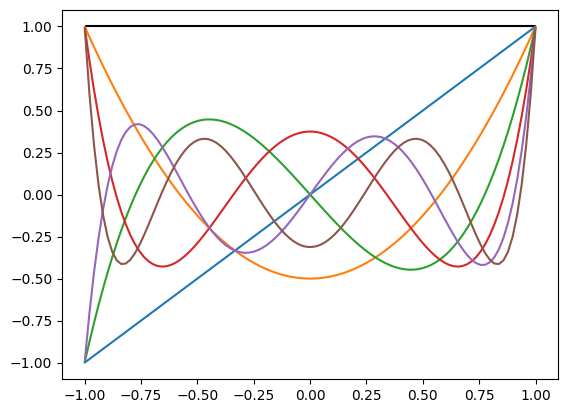

In [3]:
x_ax=np.linspace(-0.999,0.999,100)
for i in range(7):
    if i==0:
        plt.hlines(1,xmin=-1,xmax=1,colors="k")
    else:
        g=Legendre(i)
        plt.plot(x_ax,g(x_ax))
    


In [4]:
def Legendre_asociado(l,m):
    x=sp.symbols("x")
    poly=(-1)**m/(mat.factorial(l)*2**l)*(1-x**2)**(m/2)*sp.diff((x**2-1)**l,x,l+m) #formula de rodrigues asociado 
    return sp.lambdify(x,poly)

In [163]:
def gr_asociado(ls):
    q=len(ls)
    fig=plt.figure(figsize=(q*2,q*2))
    for j in range(q):
        q2=int(np.ceil(q/2))
        ax=fig.add_subplot(q2,q2,j+1)
        for i in range(-ls[j],ls[j] +1):
            g=Legendre_asociado(ls[j],i)
            ax.plot(x_ax,g(x_ax))
        ax.set_title(rf"$\ell={ls[j]}$")
        
        
    

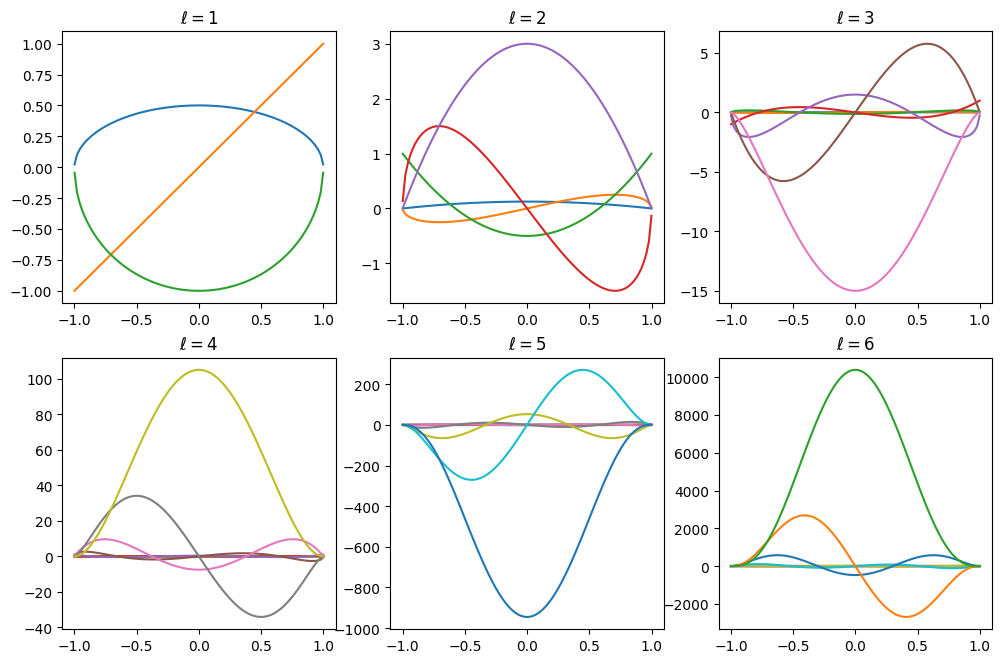

In [164]:
gr_asociado([1,2,3,4,5,6])